In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize
import murraylab_tools.biotek as btek
import itertools

%matplotlib qt5
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from cycler import cycler
import numpy as np

mpl.font_manager._rebuild()
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 1.5})
sns.set_style("ticks")
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})

%matplotlib inline
%config InlineBackend.figure_f.ormats=['svg']

mpl.rc('axes', prop_cycle=(cycler('color', ['r', 'k', 'b','g','y','m','c']) ))

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

#mpl.rc('text', usetex=False)
#mpl.rc('text.latex', preamble=r'\usepackage{helvet}
#\renewcommand\familydefault{\sfdefault}\usepackage{sansmath}\sansmath')
mpl.rc('font',**{'family':'sans-serif','sans-serif':['Roboto'], 
                 'serif': ['Roboto'],'weight':'normal'})
mpl.font_manager._rebuild()
tw = 1.5
sns.set_style({"xtick.major.size": 3, "ytick.major.size": 3,
               "xtick.minor.size": 2, "ytick.minor.size": 2,
               'axes.labelsize': 16, 'axes.titlesize': 16,
               'xtick.major.width': tw, 'xtick.minor.width': tw,
               'ytick.major.width': tw, 'ytick.minor.width': tw})

mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20)
mpl.rc('axes', linewidth=1.5)
mpl.rc('legend', fontsize=14)
mpl.rc('figure', figsize=(8.5,15))

This jupyter notebook takes raw biotek data and generates plots for Figure 4C

In [3]:
btek.tidy_biotek_data('./20190304_T7diff.xlsx',convert_to_uM=False,volume=300, supplementary_filename='20190304_T7diff_metadata.csv')

In [4]:
data = pd.read_csv('./20190304_T7diff_tidy.csv')
data_norm = btek.normalize(data)

OD_data = data.loc[data.Channel=='OD600',:]
YFP_data = data.loc[(data.Channel=='sfYFP') & (data.Gain==61),:]
YFP_norm = data_norm.loc[(data_norm.Channel=='sfYFP') & (data_norm.Gain==61),:]

# Get averages and variances from replicates
OD_data_avgs = OD_data.groupby(['strain','sal','las','iptg','Time (hr)'],as_index=False)['Measurement'].mean()
OD_data_vars = OD_data.groupby(['strain','sal','las','iptg','Time (hr)'],as_index=False)['Measurement'].var()
YFP_data_avgs = YFP_data.groupby(['strain','sal','las','iptg','Time (hr)'],as_index=False)['Measurement'].mean()
YFP_data_vars = YFP_data.groupby(['strain','sal','las','iptg','Time (hr)'],as_index=False)['Measurement'].var()
YFP_norm_avgs = YFP_norm.groupby(['strain','sal','las','iptg','Time (hr)'],as_index=False)['Measurement'].mean()
YFP_norm_vars = YFP_norm.groupby(['strain','sal','las','iptg','Time (hr)'],as_index=False)['Measurement'].var()
OD_data_avgs['std'] = np.sqrt(OD_data_vars['Measurement'].values)
YFP_data_avgs['std'] = np.sqrt(YFP_data_vars['Measurement'].values)
YFP_norm_avgs['std'] = np.sqrt(YFP_norm_vars['Measurement'].values)


C:\Users\Rory\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


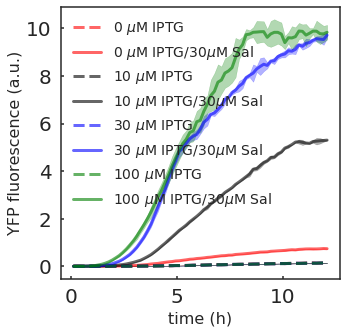

In [9]:
sal_concs = np.array([0,30])
iptg_concs = np.array([0,10,30,100])
fig, ax = plt.subplots(figsize=(5,5))
    
for i, iptg_conc in enumerate(iptg_concs):
    for j, sal_conc in enumerate(sal_concs):
        if sal_conc == 0:
            linestyle='--'
        else:
            linestyle='-'
        t = YFP_data_avgs.loc[(YFP_data_avgs.strain=='T7diff') & (YFP_data_avgs.sal==sal_conc) & \
                                     (YFP_data_avgs.iptg==iptg_conc),
                                         'Time (hr)'].values
        avg = YFP_data_avgs.loc[(YFP_data_avgs.strain=='T7diff') & (YFP_data_avgs.sal==sal_conc) & \
                                 (YFP_data_avgs.iptg==iptg_conc),
                                   'Measurement'].values/1000
        std = YFP_data_avgs.loc[(YFP_data_avgs.strain=='T7diff') & (YFP_data_avgs.sal==sal_conc) & \
                                 (YFP_data_avgs.iptg==iptg_conc),
                                   'std'].values/1000
#         ax[0].plot(t, avg, linestyle, color=sns.color_palette()[i],linewidth=3,alpha=0.6)
        ax.plot(t, avg, linestyle, color=sns.color_palette()[i],linewidth=3,alpha=0.6)

        ax.fill_between(t, avg - std, avg + std,color=sns.color_palette()[i],alpha=0.3)
ax.legend(['0 $\mu$M IPTG','0 $\mu$M IPTG/30$\mu$M Sal',
           '10 $\mu$M IPTG','10 $\mu$M IPTG/30$\mu$M Sal',
           '30 $\mu$M IPTG','30 $\mu$M IPTG/30$\mu$M Sal',
           '100 $\mu$M IPTG','100 $\mu$M IPTG/30$\mu$M Sal'])
ax.set_xlabel('time (h)')
ax.set_ylabel('YFP fluorescence (a.u.)')

C:\Users\Rory\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


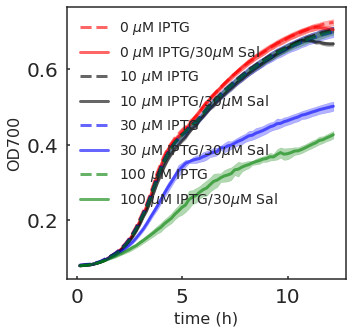

In [10]:
sal_concs = np.array([0,30])
iptg_concs = np.array([0,10,30,100])
fig, ax = plt.subplots(figsize=(5,5))
    
for i, iptg_conc in enumerate(iptg_concs):
    for j, sal_conc in enumerate(sal_concs):
        if sal_conc == 0:
            linestyle='--'
        else:
            linestyle='-'
        t = OD_data_avgs.loc[(OD_data_avgs.strain=='T7diff') & (OD_data_avgs.sal==sal_conc) & \
                                     (OD_data_avgs.iptg==iptg_conc),
                                         'Time (hr)'].values
        avg = OD_data_avgs.loc[(OD_data_avgs.strain=='T7diff') & (OD_data_avgs.sal==sal_conc) & \
                                 (OD_data_avgs.iptg==iptg_conc),
                                   'Measurement'].values
        std = OD_data_avgs.loc[(OD_data_avgs.strain=='T7diff') & (OD_data_avgs.sal==sal_conc) & \
                                 (OD_data_avgs.iptg==iptg_conc),
                                   'std'].values
#         ax[0].plot(t, avg, linestyle, color=sns.color_palette()[i],linewidth=3,alpha=0.6)
        ax.plot(t, avg, linestyle, color=sns.color_palette()[i],linewidth=3,alpha=0.6)

        ax.fill_between(t, avg - std, avg + std,color=sns.color_palette()[i],alpha=0.3)
ax.legend(['0 $\mu$M IPTG','0 $\mu$M IPTG/30$\mu$M Sal',
           '10 $\mu$M IPTG','10 $\mu$M IPTG/30$\mu$M Sal',
           '30 $\mu$M IPTG','30 $\mu$M IPTG/30$\mu$M Sal',
           '100 $\mu$M IPTG','100 $\mu$M IPTG/30$\mu$M Sal'])        
ax.set_xlabel('time (h)')
ax.set_ylabel('OD700')